# Import Libraries


In [1]:
# Week 5 — Cell 1: Importing Libraries (Decision Tree - Iris Classification)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


# Load Dataset

In [2]:
# Week 5 — Cell 2: Load Iris dataset

# Load Iris dataset from sklearn
iris = load_iris()

# Create DataFrame for features
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create Series for target
y = pd.Series(iris.target, name="species")

print("Dataset loaded successfully!")
print("\nFeature Data (first 5 rows):")
display(X.head())

print("\nTarget labels (first 5):")
print(y.head())

print("\nTarget classes:")
print(iris.target_names)


Dataset loaded successfully!

Feature Data (first 5 rows):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Target labels (first 5):
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Target classes:
['setosa' 'versicolor' 'virginica']


# Train Test Split

In [3]:
# Week 5 — Cell 3: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training set shape:")
print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)

print("\nTesting set shape:")
print(" X_test :", X_test.shape)
print(" y_test :", y_test.shape)


Training set shape:
 X_train: (112, 4)
 y_train: (112,)

Testing set shape:
 X_test : (38, 4)
 y_test : (38,)


# Train Decision Tree Classifier

In [4]:
# Week 5 — Cell 4: Train Decision Tree classifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',      # default splitting criterion
    max_depth=4,           # limit depth to avoid overfitting
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


# Predictions

In [5]:
# Week 5 — Cell 5: Predictions

# Predict species on test data
y_pred = dt_model.predict(X_test)

print("Predictions generated successfully!")
print("First 10 predictions:", y_pred[:10])


Predictions generated successfully!
First 10 predictions: [0 1 1 1 0 1 2 2 2 2]


# Accuracy

In [6]:
# Week 5 — Cell 6: Accuracy score

accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


Decision Tree Accuracy: 92.11%


# Classification Report

In [7]:
# Week 5 — Cell 7: Classification Report

report = classification_report(
    y_test,
    y_pred,
    target_names=iris.target_names
)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



# Visualize the tree

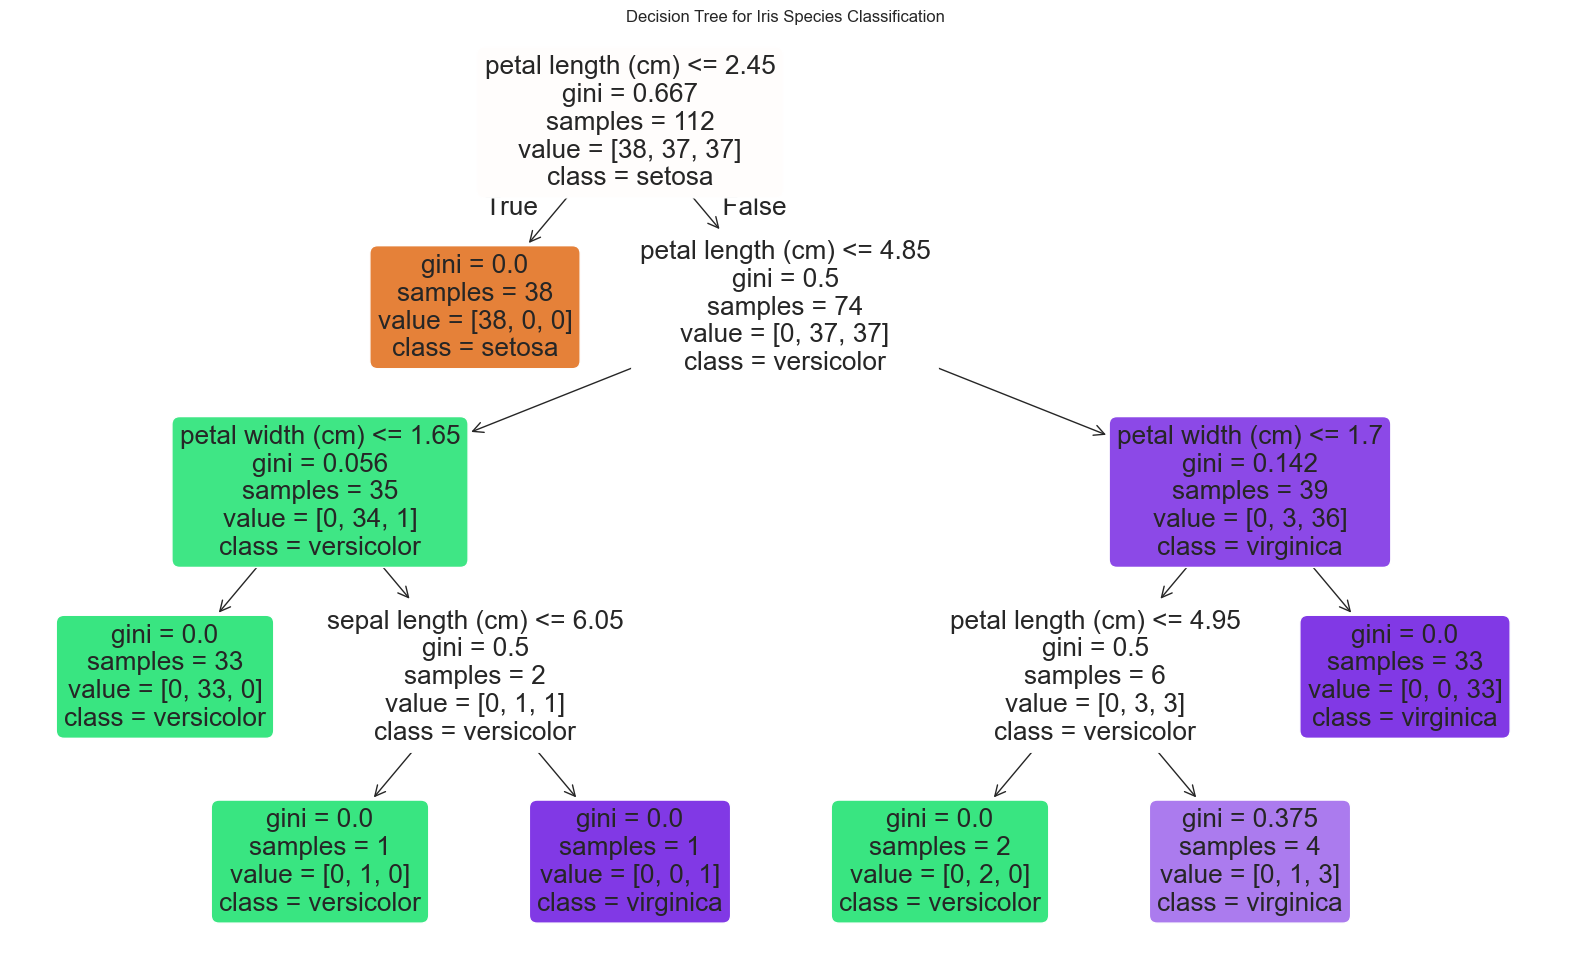

In [8]:
# Week 5 — Cell 8: Visualize the Decision Tree

plt.figure(figsize=(20, 12))

plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)

plt.title("Decision Tree for Iris Species Classification")
plt.show()
